In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (7043, 21)


In [2]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Total missing values: 0


In [3]:
print("Data types:")
print(df.dtypes)

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [4]:
print("Unique values in categorical columns:")
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Unique values in categorical columns:
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']


In [5]:
print("TotalCharges unique values sample:")
print(df['TotalCharges'].unique()[:10])

print("SeniorCitizen distribution:")
print(df['SeniorCitizen'].value_counts())

TotalCharges unique values sample:
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
SeniorCitizen distribution:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


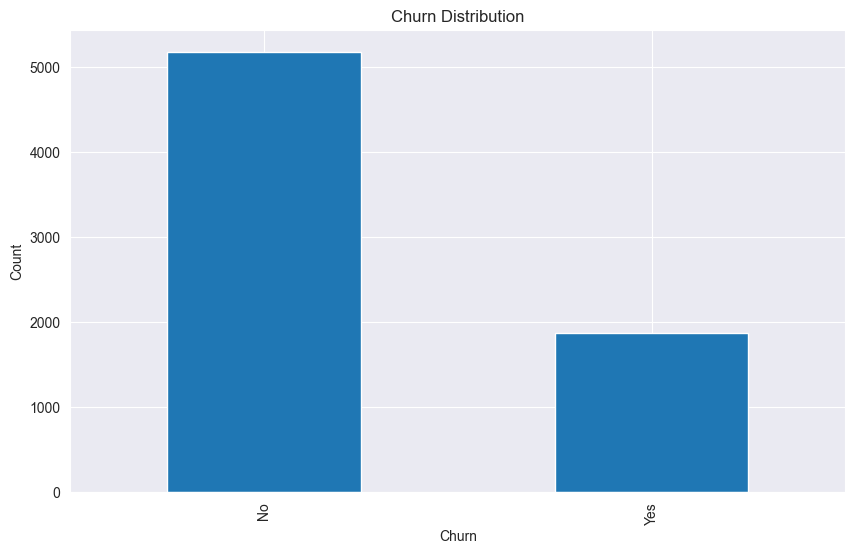

In [6]:
plt.figure(figsize=(10, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [7]:
print("TotalCharges unique values before:")
print(df['TotalCharges'].unique()[:10])

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing values after conversion:", df['TotalCharges'].isnull().sum())

TotalCharges unique values before:
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Missing values after conversion: 11


In [8]:
median_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_charges)

print("Missing values after filling:", df['TotalCharges'].isnull().sum())

Missing values after filling: 0


In [9]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn counts:")
print(churn_counts)
print("\nChurn percentages:")
print(churn_percentage)

Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentages:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


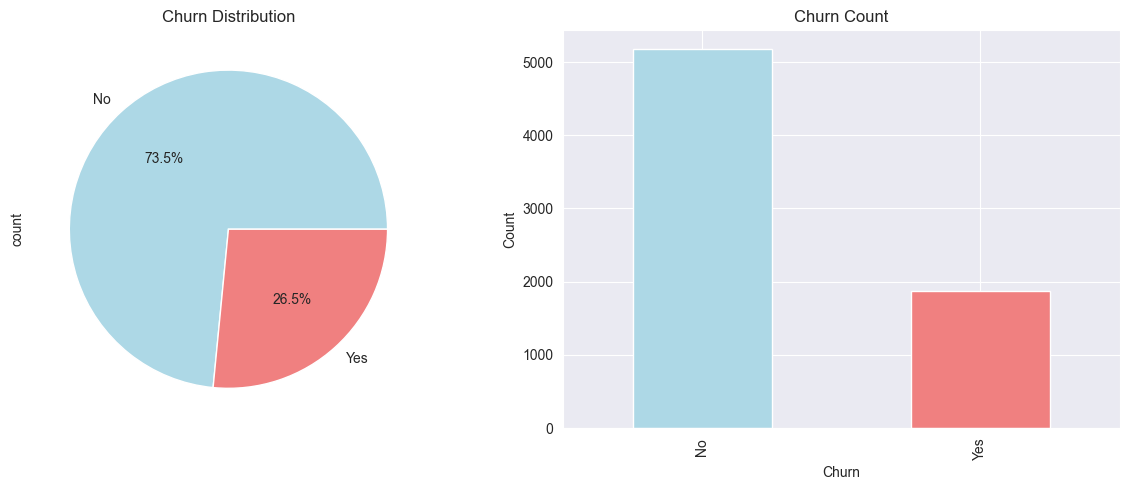

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution')

plt.subplot(1, 2, 2)
df['Churn'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

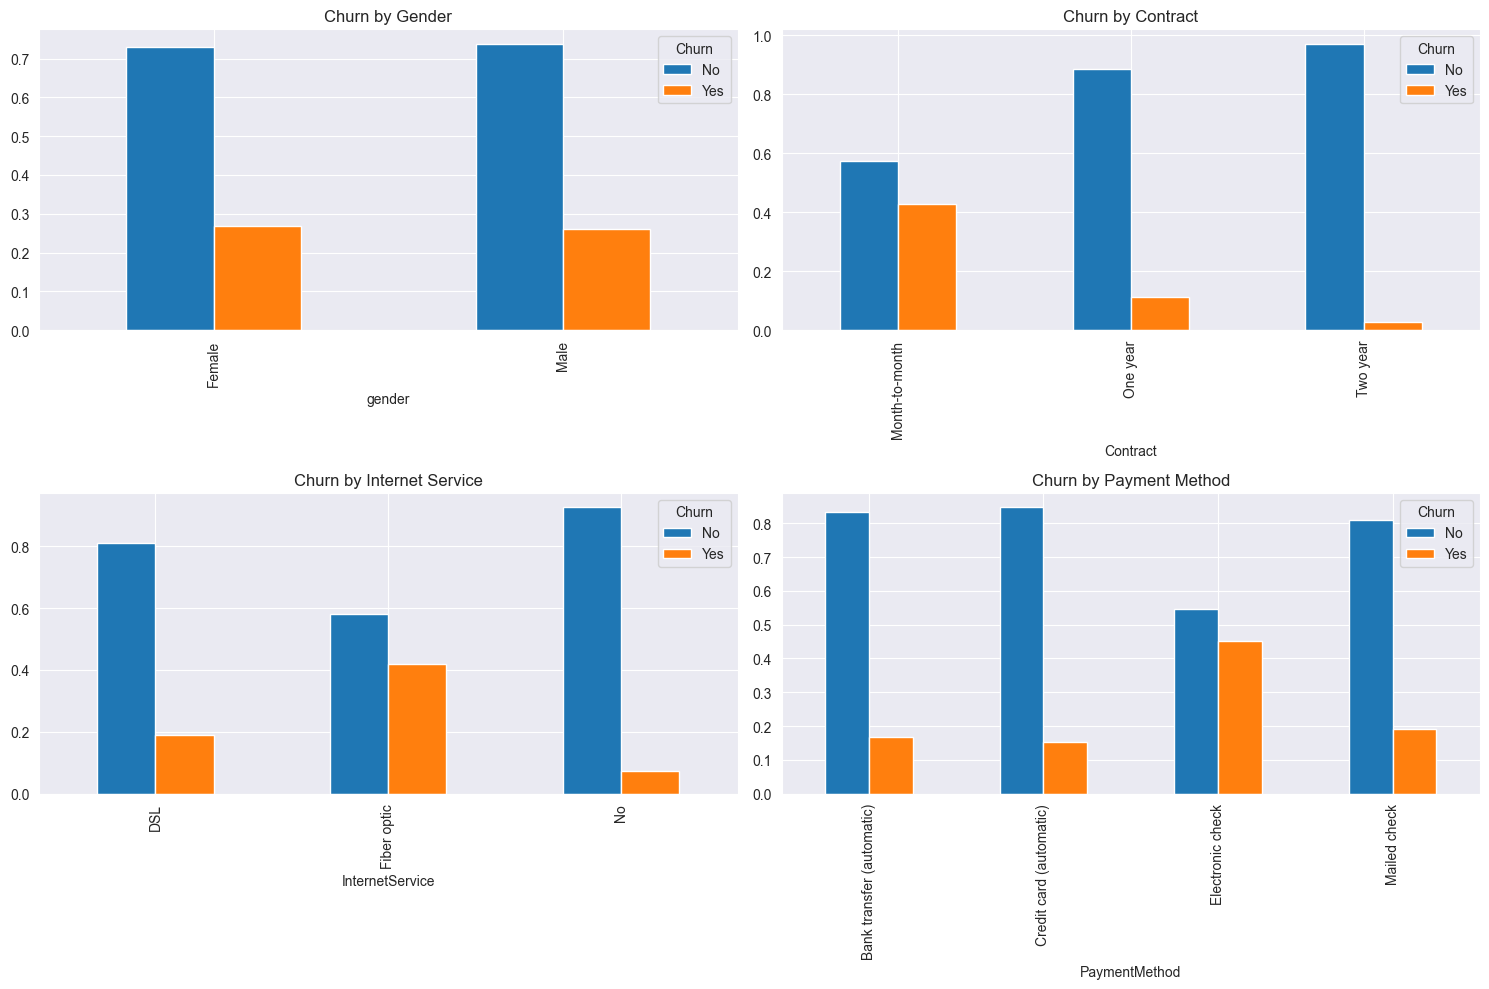

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Churn by Gender')

df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Churn by Contract')

df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Churn by Internet Service')

df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Churn by Payment Method')

plt.tight_layout()
plt.show()

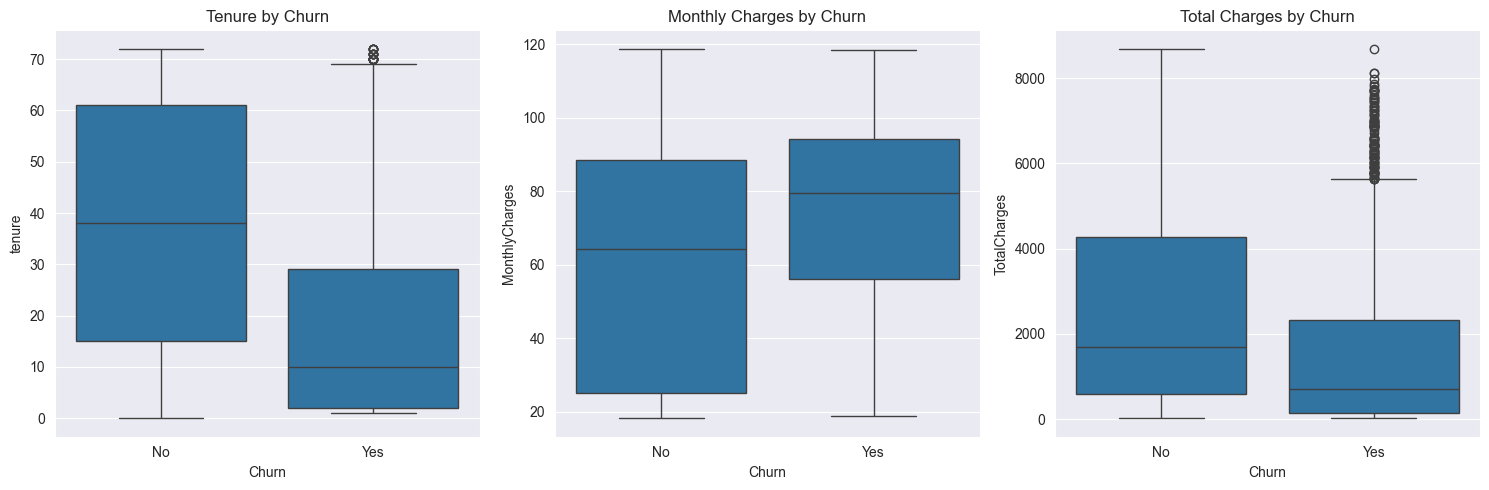

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')

plt.tight_layout()
plt.show()

In [13]:
churn_ratio = churn_counts['Yes'] / churn_counts['No']
print(f"Churn to Non-Churn ratio: {churn_ratio:.2f}")
print(f"Minority class percentage: {churn_percentage['Yes']:.1f}%")

Churn to Non-Churn ratio: 0.36
Minority class percentage: 26.5%


In [14]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Numerical features statistics:")
print(df[numerical_features].describe())

Numerical features statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


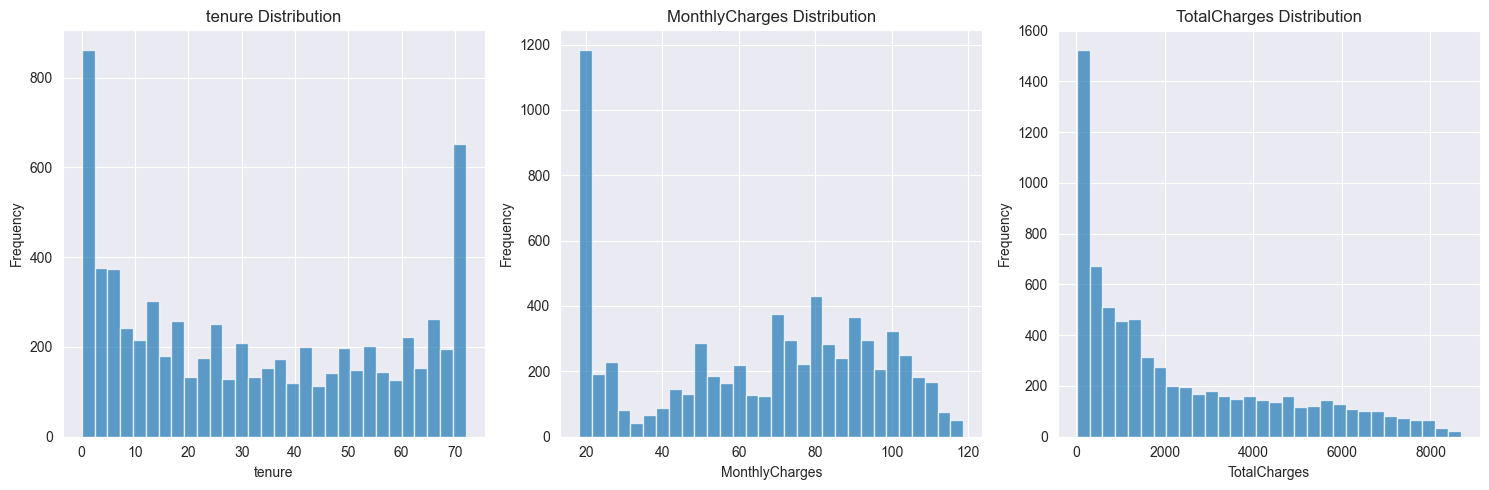

In [15]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    df[feature].hist(bins=30, alpha=0.7)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

print("Categorical features value counts (first 6):")
for feature in categorical_features[:6]:
    print(f"\n{feature}:")
    print(df[feature].value_counts())

Categorical features value counts (first 6):

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


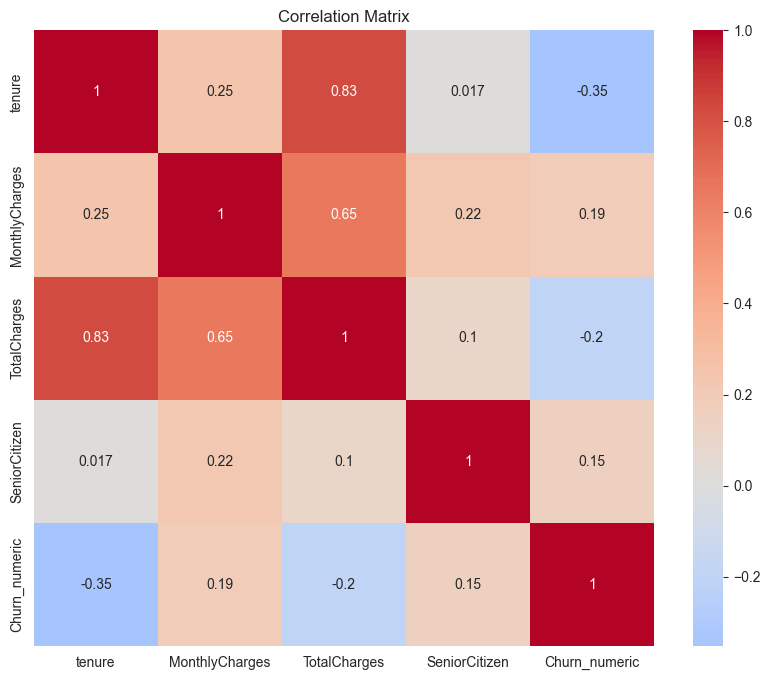

In [17]:
plt.figure(figsize=(10, 8))

numerical_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].copy()
numerical_df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

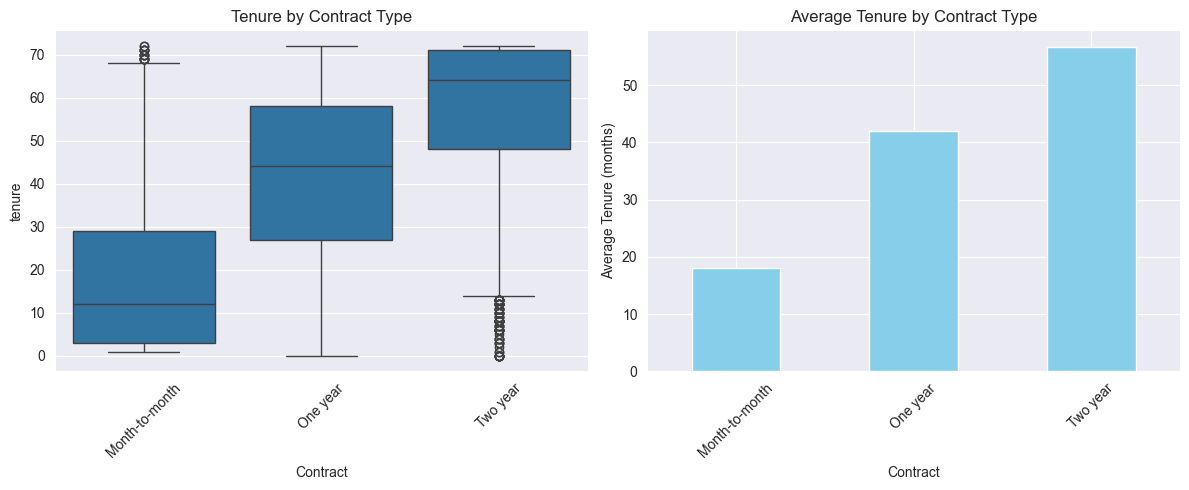

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Contract', y='tenure', data=df)
plt.title('Tenure by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
contract_tenure = df.groupby('Contract')['tenure'].mean()
contract_tenure.plot(kind='bar', color='skyblue')
plt.title('Average Tenure by Contract Type')
plt.ylabel('Average Tenure (months)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

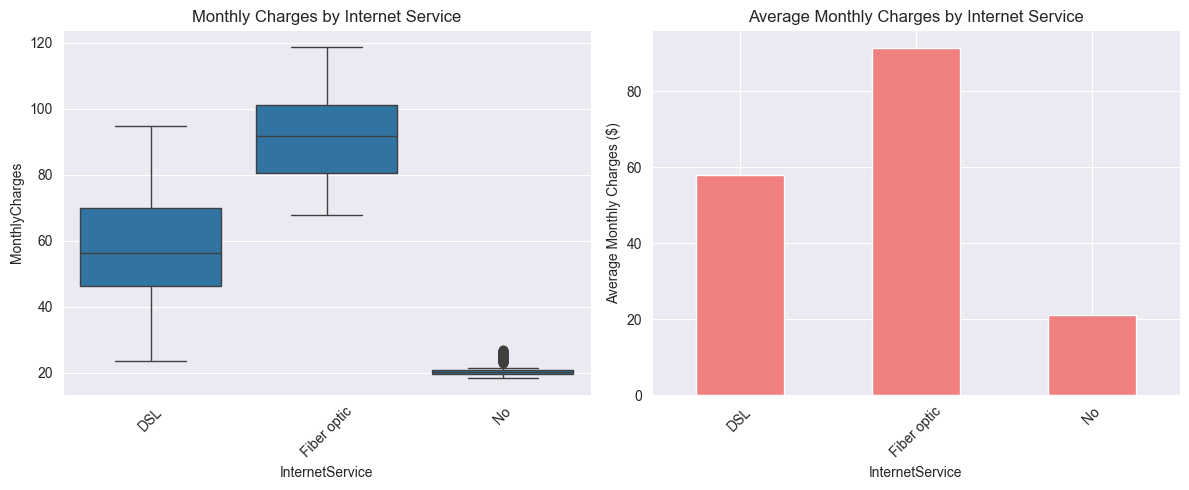

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='InternetService', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Internet Service')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
service_charges = df.groupby('InternetService')['MonthlyCharges'].mean()
service_charges.plot(kind='bar', color='lightcoral')
plt.title('Average Monthly Charges by Internet Service')
plt.ylabel('Average Monthly Charges ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

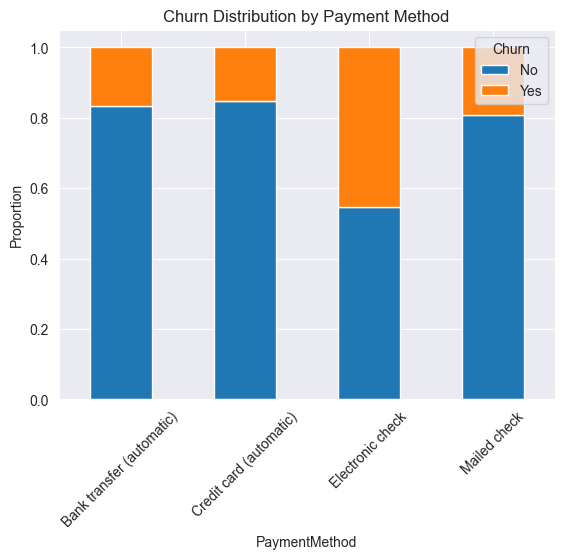

In [20]:
plt.figure(figsize=(10, 6))
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_churn.plot(kind='bar', stacked=True)
plt.title('Churn Distribution by Payment Method')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

In [21]:
print(
    f" KEY INSIGHTS \n"
    f"Average tenure: {df['tenure'].mean():.1f} months\n"
    f"Average monthly charges: ${df['MonthlyCharges'].mean():.2f}\n"
    f"Most common contract: {df['Contract'].mode()[0]}\n"
    f"Most common internet service: {df['InternetService'].mode()[0]}\n"
    f"Overall churn rate: {churn_percentage['Yes']:.1f}%"
)


 KEY INSIGHTS 
Average tenure: 32.4 months
Average monthly charges: $64.76
Most common contract: Month-to-month
Most common internet service: Fiber optic
Overall churn rate: 26.5%
